# **Baseline**

Here we will use a simple model as baselines to compare with our classic feature extraction model.

## **Libraries**

In [1]:
import os

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## **Auxiliar Functions**

In [2]:
def blue_percentage(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_l = np.array([100, 150, 0])
    hsv_h = np.array([140, 255, 255])
    return cv2.inRange(hsv, hsv_l, hsv_h).sum() / (img.shape[0] * img.shape[1])

In [9]:
load_images = lambda paths: [np.array(Image.open(path)) for path in paths]

def load_dataset(data_path):
    positive_images = os.listdir(os.path.join(data_path, 'pools'))
    positive_images = [os.path.join(data_path, 'pools', image) for image in positive_images]
    positive_images = load_images(positive_images)

    negative_images = os.listdir(os.path.join(data_path, 'no_pools'))
    negative_images = [os.path.join(data_path, 'no_pools', image) for image in negative_images]
    negative_images = load_images(negative_images)
    
    return positive_images, negative_images

## **Directories**

In [7]:
DATASET_DIR = os.path.join('..', 'data', 'datasets')
TRAIN_DIR = os.path.join(DATASET_DIR, 'yacine', 'train')
TEST_DIR = os.path.join(DATASET_DIR, 'yacine', 'validation')

## **Model**

The baseline model will return 1 if the image has blue pixels (pixels within the HSV space region)
and 0 if not.

In [11]:
def one_if_blue(test_positive_images, test_negative_images):
    X_test = np.array(test_positive_images + test_negative_images)
    y_test = np.array([1] * len(test_positive_images) + [0] * len(test_negative_images))
    y_pred = np.array([1 if blue_percentage(img) > 0 else 0 for img in X_test])
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
    disp.plot()
    plt.show()

## **Evaluation**

### **Main dataset**

In [10]:
train_positive_images, train_negative_images = load_dataset(TRAIN_DIR)
test_positive_images, test_negative_images = load_dataset(TEST_DIR)

Test with 1 if blue
              precision    recall  f1-score   support

           0       0.90      0.54      0.68       176
           1       0.68      0.94      0.79       179

    accuracy                           0.74       355
   macro avg       0.79      0.74      0.73       355
weighted avg       0.79      0.74      0.73       355



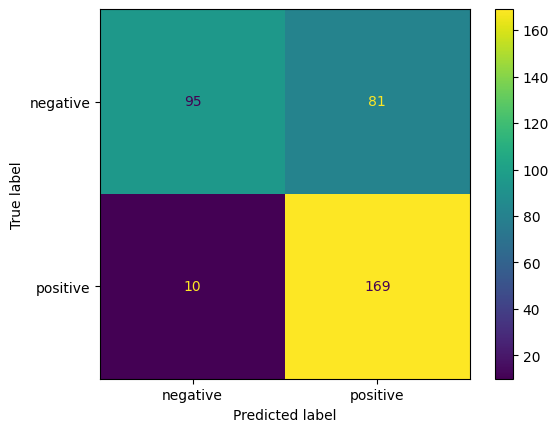

In [12]:
print('Test with 1 if blue')
one_if_blue(test_positive_images, test_negative_images)

### **Algarves dataset**

In [15]:
ALGARVES_DATASET = os.path.join(DATASET_DIR, 'algarves', 'formatted_dataset')

In [16]:
algarves_positive_images, algarves_negative_images = load_dataset(ALGARVES_DATASET)

In [17]:
train_shape = train_positive_images[0].shape[:2]
algarves_positive_images = [np.array(Image.fromarray(img).resize(train_shape)) for img in algarves_positive_images]
algarves_negative_images = [np.array(Image.fromarray(img).resize(train_shape)) for img in algarves_negative_images]

Test with 1 if blue
              precision    recall  f1-score   support

           0       0.40      0.63      0.49       117
           1       0.59      0.35      0.44       172

    accuracy                           0.47       289
   macro avg       0.49      0.49      0.47       289
weighted avg       0.51      0.47      0.46       289



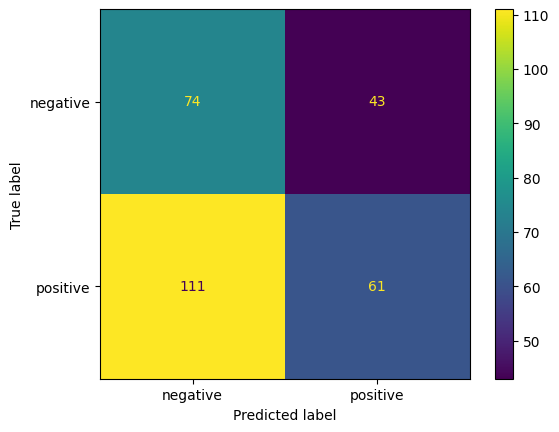

In [18]:
print('Test with 1 if blue')
one_if_blue(algarves_positive_images, algarves_negative_images)

### **Algarves fragmented dataset**

In [21]:
ALGARVES_DATASET = os.path.join(DATASET_DIR, 'algarves', 'fragmented_dataset')

In [22]:
algarves_positive_images, algarves_negative_images = load_dataset(ALGARVES_DATASET)

Test with 1 if blue
              precision    recall  f1-score   support

           0       0.82      0.53      0.65      1847
           1       0.14      0.39      0.20       352

    accuracy                           0.51      2199
   macro avg       0.48      0.46      0.43      2199
weighted avg       0.71      0.51      0.58      2199



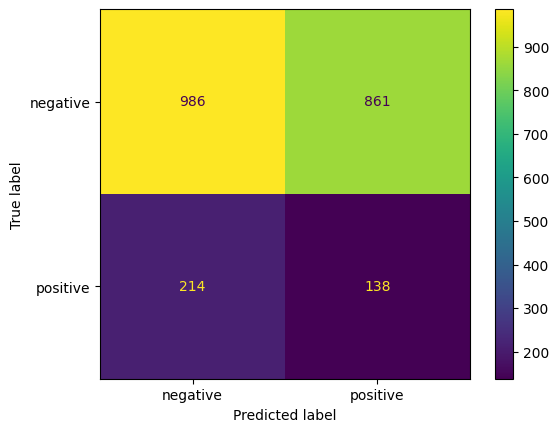

In [23]:
print('Test with 1 if blue')
one_if_blue(algarves_positive_images, algarves_negative_images)